In [3]:
import pandas as pd


home_data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/house_data.csv')
feature_columns = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

In [9]:
X = home_data[feature_columns]
y = home_data['SalePrice']

In [12]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # randomisation seed

In [40]:
for item in (X_train, X_test, y_train, y_test):
    print(item.shape)

(1095, 7)
(365, 7)
(1095,)
(365,)


In [41]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [42]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
print('Ошибка на тренировочной выборке')
print(mean_absolute_error(train_predict, y_train))

Ошибка на тренировочной выборке
88.96286149162863


In [46]:
print('Ошибка на тестовой выборке')
print(mean_absolute_error(test_predict, y_test))

Ошибка на тренировочной выборке
26121.36712328767


In [20]:
y.mean()

180921.19589041095

In [47]:
model = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=15, random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 15,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [49]:
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [50]:
print('Ошибка на тренировочной выборке')
print(mean_absolute_error(train_predict, y_train))

Ошибка на тренировочной выборке
25820.49019371254


In [51]:
print('Ошибка на тестовой выборке')
print(mean_absolute_error(test_predict, y_test))

Ошибка на тестовой выборке
27645.527309672878


In [52]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
forest.fit(X_train, y_train)
train_predict = forest.predict(X_train)
test_predict = forest.predict(X_test)

print('Ошибка на тестовой выборке')
print(mean_absolute_error(test_predict, y_test))

Ошибка на тестовой выборке
25423.068258073203


In [59]:
# сравниваем значения ошибок для случайного леса, перебирая количество деревьев
errors_train = []
errors_test = []


for n_estimators in range(1, 100):
    forest = RandomForestRegressor(n_estimators=n_estimators)
    forest.fit(X_train, y_train)
    train_predict = forest.predict(X_train)
    test_predict = forest.predict(X_test)
    errors_train.append(mean_absolute_error(train_predict, y_train))
    errors_test.append(mean_absolute_error(test_predict, y_test))

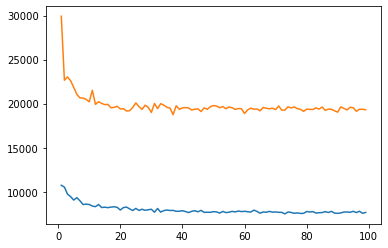

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1, 100), errors_train)
plt.plot(range(1, 100), errors_test)

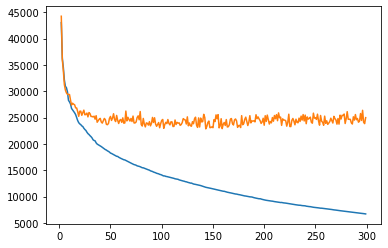

In [72]:
# сравниваем значения ошибок для дерева, перебирая количество листовых вершин

errors_train = []
errors_test = []


for nodes in range(2, 300):
    forest = DecisionTreeRegressor(max_leaf_nodes=nodes)
    forest.fit(X_train, y_train)
    train_predict = forest.predict(X_train)
    test_predict = forest.predict(X_test)
    errors_train.append(mean_absolute_error(train_predict, y_train))
    errors_test.append(mean_absolute_error(test_predict, y_test))
    
plt.plot(range(2, 300), errors_train)
plt.plot(range(2, 300), errors_test)

In [82]:
from sklearn.model_selection import GridSearchCV
search_model = GridSearchCV(RandomForestRegressor(), {"n_estimators":[10, 25, 50], "max_depth":[1, 10, 20]})
search_model.fit(X_train, y_train)
search_model.cv_results_

{'mean_fit_time': array([0.02053328, 0.03171263, 0.06027241, 0.03588972, 0.07723908,
        0.15971632, 0.03738232, 0.09005523, 0.18296118]),
 'std_fit_time': array([0.00977027, 0.00039656, 0.00043733, 0.00239002, 0.00152933,
        0.00879487, 0.00076436, 0.00179173, 0.00555609]),
 'mean_score_time': array([0.00473022, 0.00292664, 0.00417705, 0.00288324, 0.00362639,
        0.0056982 , 0.00264268, 0.00376077, 0.00647726]),
 'std_score_time': array([3.41761328e-03, 2.77162598e-05, 1.54373583e-04, 4.97800303e-04,
        9.35335746e-05, 2.77374212e-04, 1.61995233e-04, 1.64915357e-05,
        2.75960400e-04]),
 'param_max_depth': masked_array(data=[1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 25, 50, 10, 25, 50, 10, 25, 50],
              mask=[False, False, False, False, False, False, False, False

In [84]:
search_model.cv_results_['mean_score_time']

array([0.00473022, 0.00292664, 0.00417705, 0.00288324, 0.00362639,
       0.0056982 , 0.00264268, 0.00376077, 0.00647726])

In [86]:
search_model.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=25)

In [ ]:
best_model = RandomForestRegressor(max_depth=10, n_estimators=25)
best_model.fit(X_train, y_train)
test_pred = best_model.predict(X_test)
print(mean_absolute_error(test_pred, y_test))

# Работа с текстом

In [89]:
simple_train = ['call you tonight', 'Call me a cab', 'call 222-22-22', 'please call me.. please']
# word2vec

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [90]:
vect.fit(simple_train)

CountVectorizer()

In [91]:
simple_train = ['call you tonight', 'Call me a cab', 'call 222-22-22', 'please call me.. please']

vect.get_feature_names()

['22', '222', 'cab', 'call', 'me', 'please', 'tonight', 'you']

In [96]:
simple_train_matrix = vect.transform(simple_train)
print(simple_train_matrix)

  (0, 3)	1
  (0, 6)	1
  (0, 7)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (2, 0)	2
  (2, 1)	1
  (2, 3)	1
  (3, 3)	1
  (3, 4)	1
  (3, 5)	2


In [94]:
simple_train_matrix.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 0],
       [2, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 2, 0, 0]])

In [95]:
pd.DataFrame(simple_train_matrix.toarray(), columns=vect.get_feature_names(), index=simple_train)

,22,222,cab,call,me,please,tonight,you
call you tonight,0,0,0,1,0,0,1,1
Call me a cab,0,0,1,1,1,0,0,0
call 222-22-22,2,1,0,1,0,0,0,0
please call me.. please,0,0,0,1,1,2,0,0


In [97]:
simple_test = ['Please don\'t call me, I will be busy']
simple_test_matrix = vect.transform(simple_test)
simple_test_matrix.toarray()

array([[0, 0, 0, 1, 1, 1, 0, 0]])

In [98]:
pd.DataFrame(simple_test_matrix.toarray(), columns=vect.get_feature_names(), index=simple_test)

,22,222,cab,call,me,please,tonight,you
"Please don't call me, I will be busy",0,0,0,1,1,1,0,0


In [101]:
!pip install pymorphy2

You should consider upgrading via the '/Users/rogovich/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [107]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
morph.parse('стали')[0].normal_form

'стать'

In [108]:
text = "сегодняшняя самостоятельная станет небольшим домашним заданием с дедлайном до среды"
for word in text.split():
    print(morph.parse(word)[0].normal_form)


сегодняшний
самостоятельный
стать
небольшой
домашний
задание
с
дедлайн
до
среда


In [109]:
import requests
ru_stopwords = requests.get('https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt').text
print(ru_stopwords)

/Users/rogovich/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


c
а
алло
без
белый
близко
более
больше
большой
будем
будет
будете
будешь
будто
буду
будут
будь
бы
бывает
бывь
был
была
были
было
быть
в
важная
важное
важные
важный
вам
вами
вас
ваш
ваша
ваше
ваши
вверх
вдали
вдруг
ведь
везде
вернуться
весь
вечер
взгляд
взять
вид
видел
видеть
вместе
вне
вниз
внизу
во
вода
война
вокруг
вон
вообще
вопрос
восемнадцатый
восемнадцать
восемь
восьмой
вот
впрочем
времени
время
все
все еще
всегда
всего
всем
всеми
всему
всех
всею
всю
всюду
вся
всё
второй
вы
выйти
г
где
главный
глаз
говорил
говорит
говорить
год
года
году
голова
голос
город
да
давать
давно
даже
далекий
далеко
дальше
даром
дать
два
двадцатый
двадцать
две
двенадцатый
двенадцать
дверь
двух
девятнадцатый
девятнадцать
девятый
девять
действительно
дел
делал
делать
делаю
дело
день
деньги
десятый
десять
для
до
довольно
долго
должен
должно
должный
дом
дорога
друг
другая
другие
других
друго
другое
другой
думать
душа
е
его
ее
ей
ему
если
есть
еще
ещё
ею
её
ж
ждать
же
жена
женщина
жизнь
жить
за
занят
занята
за